# Figure 2: 

Zonal-mean changes in temperature and zonal wind (black contours, m s−1) at day 3 for simulations with (a) all-sky radiation, (b) no radiation, and (c) cloud radiation only.

---
@ Behrooz Keshtgar, KIT 2022

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


## 2- Loading datasets

In [3]:
# Simulations dictionary 
simdict = {
         'LC1-channel-4000x9000km-80km-0001' : {'res':'80km', 'radiation':1, 'rh':0.8}, # Full radiation
         'LC1-channel-4000x9000km-80km-0002' : {'res':'80km', 'radiation':0, 'rh':0.8}, # No radiation
         'LC1-channel-4000x9000km-80km-0003' : {'res':'80km', 'radiation':1, 'rh':0.8}, # Cloud radiation
             }

In [4]:
# loading 3d datasets
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        print('Working on loading data for', sim)
        # loading remapped datasets (0.5x0.5 r)
        path = path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        fname = path+'icon-atm3d_reg_con*.nc'                                                                          
        ds_var = xr.open_mfdataset(fname)[['u','temp','z_ifc']]
        ds_list.append(ds_var)
        del fname,ds_var

    return ds_list
#----------------------------------
ds_list = load_simulations()

Working on loading data for LC1-channel-4000x9000km-80km-0001
Working on loading data for LC1-channel-4000x9000km-80km-0002
Working on loading data for LC1-channel-4000x9000km-80km-0003


## 3- Temperature and zonal wind change

In [5]:
for i in range(len(ds_list)):
    # zonal mean of temperature change by day 3 
    ds_list[i]['temp_diff'] = (ds_list[i]['temp'].sel(time='20210104') - ds_list[i]['temp'].sel(time='20210101')).mean('lon').compute()
    # zonal mean of zonal wind change by day 3
    ds_list[i]['u_diff'] = (ds_list[i]['u'].sel(time='20210104') - ds_list[i]['u'].sel(time='20210101')).mean('lon').compute()
    
# deriving full geometric heights for plotting 
z_fl =  (ds_list[0].z_ifc - (ds_list[0].z_ifc.diff('height_3')/2)).values
zfull = z_fl[0,:,50,50]/1e3 # km
#-------------------------
lat = ds_list[0].lat.values    

## 4- Plot

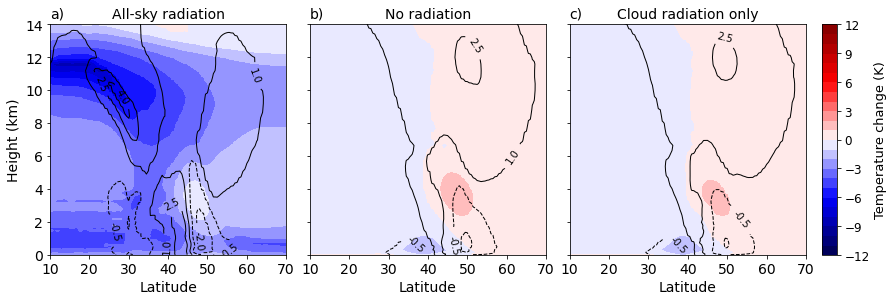

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

i = 0

for ax in axes.flat:
    
    ax.set_ylim([0, 14])
    ax.set_xlim([10, 70])
    ax.set_xticks(np.arange(10,80,10))
    ax.tick_params(labelsize=14)
    
    if i == 0:
        
        im0 = ax.contourf(lat,zfull,ds_list[0]['temp_diff'],levels=np.arange(-12,13,1),cmap=plt.get_cmap('seismic'))
        cm = ax.contour(lat,zfull,ds_list[0]['u_diff'],colors='k',linewidths=1,levels=np.arange(-5,7,1.5))
        ax.clabel(cm, inline=1, fontsize=10,fmt='%1.1f')
        ax.set_title('All-sky radiation' , fontsize=14)
        ax.text(0.0, 1.03, 'a)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_xlabel('Latitude', fontsize=14)
        
    if i == 1:
        
        im0 = ax.contourf(lat,zfull,ds_list[1]['temp_diff'],levels=np.arange(-12,13,1),cmap=plt.get_cmap('seismic'))
        cm = ax.contour(lat,zfull,ds_list[1]['u_diff'],colors='k',linewidths=1,levels=np.arange(-5,7,1.5))
        ax.clabel(cm, inline=1, fontsize=10,fmt='%1.1f')
        ax.set_title('No radiation' , fontsize=14)
        ax.text(0.0, 1.03, 'b)', transform=ax.transAxes, 
            size=14)

        ax.set_yticklabels([])
        ax.set_xlabel('Latitude', fontsize=14)
        
    if i == 2:
        
        im0 = ax.contourf(lat,zfull,ds_list[2]['temp_diff'],levels=np.arange(-12,13,1),cmap=plt.get_cmap('seismic'))
        cm = ax.contour(lat,zfull,ds_list[2]['u_diff'],colors='k',linewidths=1,levels=np.arange(-5,7,1.5))
        ax.clabel(cm, inline=1, fontsize=10,fmt='%1.1f')
        ax.set_title('Cloud radiation only' , fontsize=14)
        ax.text(0.0, 1.03, 'c)', transform=ax.transAxes, 
            size=14)
        
        #ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel('Latitude', fontsize=14)
    
    
    i = i + 1 
    
   
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.1, hspace=0.1)

cb_ax1 = fig.add_axes([0.815, 0.1, 0.014, 0.8]) # xcenter/ycenter/width/height
cbar1 = fig.colorbar(im0,cax=cb_ax1,orientation='vertical',shrink=0.95)
cbar1.set_label(label='Temperature change (K)', size='13')
cbar1.ax.tick_params(labelsize=12)

plt.savefig('figure2.pdf', bbox_inches = 'tight')